# summary cell weight data
after running the qp retrieval, segmentation and dry-weight calculation, load csv cell data summaries, group them by cnodition and compare results

In [1]:
import pandas as pd
import os
import numpy as np

from tkinter import filedialog
from tkinter import *

import matplotlib.pyplot as plt

In [2]:
def select_files(title="Select cell mass csv files "):
    root = Tk()
    root.withdraw()  # Hide the root window
    file_paths = filedialog.askopenfilenames(title=title, filetypes=[("csv files", "*.csv"), ("All files", "*.*")])
    return list(file_paths)

def load_files_to_df(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_csv(file)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

## select files

In [3]:
c_450 = select_files(title="Select 450 cell mass csv files ")
c_ctl = select_files(title="Select CTL cell mass csv files ")

## load files to dataframe 

In [4]:
c_c450_df = load_files_to_df(c_450)
c_ctl_df = load_files_to_df(c_ctl)

## summary per df 

In [5]:
c_c450_df.head(5)

,Unnamed: 0,mass,area
0,0,2.308323e-10,1.279488e-10
1,1,1.746844e-10,1.164288e-10
2,2,1.147303e-10,8.102400e-11
3,3,1.633595e-10,9.866240e-11
4,4,2.153456e-10,1.133056e-10


In [6]:
c_c450_df.describe()

,Unnamed: 0,mass,area
count,27.000000,2.700000e+01,2.700000e+01
mean,2.074074,1.706770e-10,1.163065e-10
std,1.879565,1.097427e-10,4.790676e-11
min,0.000000,6.447191e-12,4.608000e-12
25%,1.000000,5.614033e-11,1.011200e-10
50%,2.000000,1.746844e-10,1.148928e-10
75%,3.000000,2.432239e-10,1.387136e-10
max,7.000000,4.032380e-10,2.039296e-10


In [7]:
c_ctl_df.head(5)

,Unnamed: 0,mass,area
0,0,6.853713e-11,1.076992e-10
1,1,9.304030e-11,9.308160e-11
2,2,1.090555e-10,1.576448e-10
3,3,6.501236e-11,9.466880e-11
4,4,2.140179e-10,1.627648e-10


In [8]:
c_ctl_df.describe()

,Unnamed: 0,mass,area
count,88.000000,8.800000e+01,8.800000e+01
mean,8.931818,1.157006e-10,1.039599e-10
std,6.073866,6.260861e-11,3.191504e-11
min,0.000000,-5.129278e-12,4.497920e-11
25%,4.000000,6.681333e-11,8.302720e-11
50%,8.000000,9.709001e-11,1.007872e-10
75%,13.000000,1.551982e-10,1.237248e-10
max,22.000000,2.897098e-10,2.310656e-10


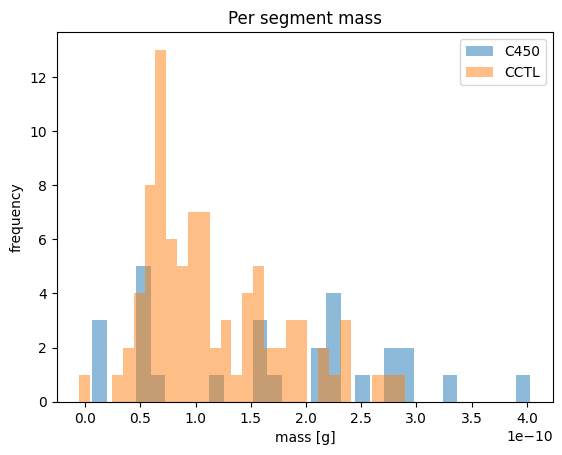

In [9]:
plt.hist(c_c450_df['mass'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['mass'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('mass [g]')
plt.ylabel('frequency')
plt.legend()
plt.title('Per segment mass')
plt.show()

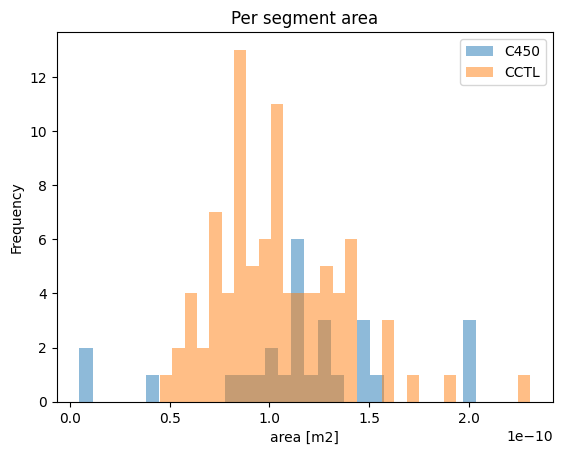

In [10]:
plt.hist(c_c450_df['area'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['area'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('Frequency')
plt.legend()
plt.title('Per segment area')
plt.show()

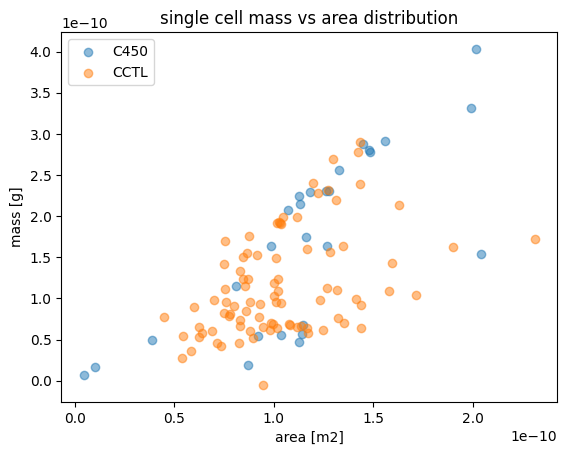

In [11]:
plt.scatter(c_c450_df['area'], c_c450_df['mass'], alpha=0.5, label='C450')
plt.scatter(c_ctl_df['area'], c_ctl_df['mass'], alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('mass [g]')
plt.legend()
plt.title('single cell mass vs area distribution')
plt.show()

## densities

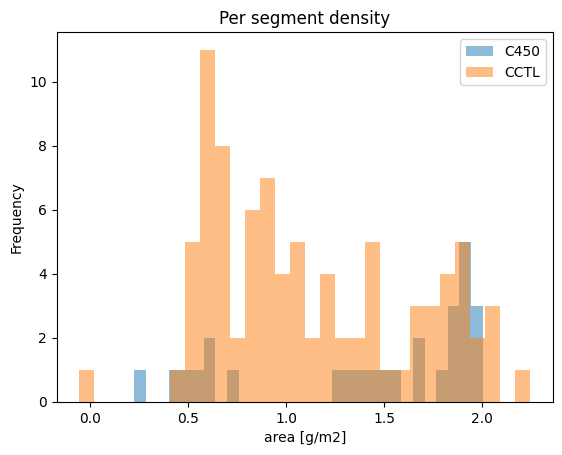

In [14]:
plt.hist(c_c450_df['mass']/c_c450_df['area'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['mass']/c_ctl_df['area'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('area [g/m2]')
plt.ylabel('Frequency')
plt.legend()
plt.title('Per segment density')
plt.show()

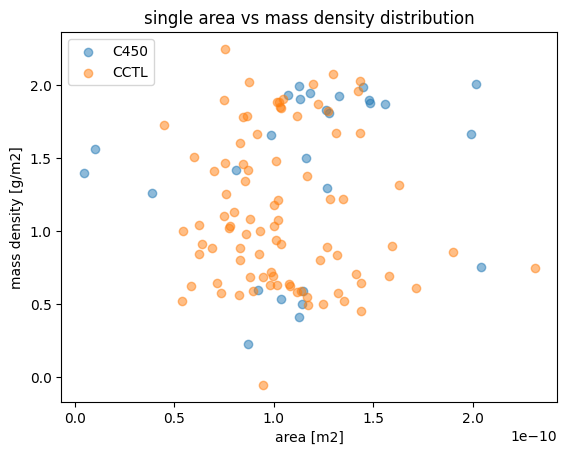

In [17]:
plt.scatter(c_c450_df['area'], c_c450_df['mass']/c_c450_df['area'], alpha=0.5, label='C450')
plt.scatter(c_ctl_df['area'], c_ctl_df['mass']/c_ctl_df['area'], alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('mass density [g/m2]')
plt.legend()
plt.title('single area vs mass density distribution')
plt.show()